# Drugi program

**Realizowane tematy:** 
1) Algorytm eliminacji Gaussa bez pivotingu generujący jedynki na przekątnej

2) Algorytm eliminacji Gaussa z pivotingiem

3) Algorytm LU faktoryzacji bez pivotingu

4) Algorytm LU faktoryzacji z pivotingiem


**Przygotowali:**
- *Tomasz Bochnak*
- *Szymon Budziak*

## Pseudokody algorytmów
*Źródło: Wykład profesora Paszyńskiego z przedmiotu Rachunek Macierzowy*
[Pseudokody](https://home.agh.edu.pl/~paszynsk/RM/RachunekMacierzowy2.pdf)

Pseudokody do wszystkich poniższych algorytmów są podane na stronie prof. Paszyńskiego podanej powyżej

![](img/slajdy.png)

## Importy

In [1]:
import numpy as np
from copy import deepcopy
from time import perf_counter

np.random.seed(101)

In [2]:
birth_month = 2
birth_date = 2
matrix_size = birth_month + birth_date

A = np.random.randint(low=0, high=10, size=(matrix_size, matrix_size))
B = np.random.randint(low=0, high=10, size=(matrix_size, 1))
time_comparisons = []

print(f'Birth month: {birth_month}, Birth date: {birth_date}')
print(f'A: {A}')
print(f'B: {B}')

Birth month: 2, Birth date: 2
A: [[1 6 7 9]
 [8 4 8 5]
 [0 5 8 1]
 [3 8 3 3]]
B: [[2]
 [8]
 [9]
 [3]]


**Przykładowe rozwiązanie dla miesiąca luty oraz dnia 2 przy pomocy np.linalg.solve**

In [3]:
start = perf_counter()
X_base = np.linalg.solve(A, B)
stop = perf_counter()

print(f'X: {X_base}')
time_comparisons.append({'np.linalg.solve': stop - start})

X: [[ 0.28463559]
 [ 0.13591596]
 [ 1.13821405]
 [-0.78529219]]


## Algorytm eliminacji Gaussa bez pivotingu generujący jedynki na przekątnej

*Źródło: Wykład profesora Paszyńskiego z przedmiotu Rachunek Macierzowy*
[Wykład](https://home.agh.edu.pl/~paszynsk/RM/RachunekMacierzowy2.pdf)
Slajd 15

In [4]:
def gaussian_elimination_no_pivot(A: np.ndarray, B: np.ndarray) -> tuple[np.ndarray, float]:
    """
    Gaussian elimination algorithm without pivoting

    Args:
        A (np.ndarray): Matrix A
        B (np.ndarray): Matrix B

    Returns:
        np.ndarray: Solution vector
        float: Execution time
    """
    A = deepcopy(A)
    B = deepcopy(B)

    n = A.shape[0]
    X = np.zeros(n)

    start = perf_counter()

    for i in range(n):
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i] = m
            for k in range(i + 1, n):
                A[j, k] = A[j, k] - m * A[i, k]
            B[j, 0] = B[j, 0] - m * B[i, 0]

    X[n - 1] = B[n - 1, 0] / A[n - 1, n - 1]
    for i in range(n - 1, -1, -1):
        sum = B[i, 0]
        for j in range(i + 1, n):
            sum = sum - A[i, j] * X[j]
        X[i] = sum / A[i, i]

    end = perf_counter()

    return np.matrix(X).T, end - start

In [5]:
X, exec_time = gaussian_elimination_no_pivot(A, B)

print(f'X: {X}')
time_comparisons.append({'Gauss no pivot': exec_time})

X: [[ 0.23354232]
 [ 0.28291536]
 [ 1.20689655]
 [-0.93103448]]


## Algorytm eliminacji Gaussa z pivotingiem

*Źródło: Wykład profesora Paszyńskiego z przedmiotu Rachunek Macierzowy*
[Wykład](https://home.agh.edu.pl/~paszynsk/RM/RachunekMacierzowy2.pdf)
Strona 31

In [6]:
def gaussian_elimination_with_pivot(A: np.ndarray, B: np.ndarray) -> tuple[np.ndarray, float]:
    """
    Gaussian elimination algorithm with pivoting

    Args:
        A (np.ndarray): Matrix A
        B (np.ndarray): Matrix B

    Returns:
        np.ndarray: Solution vector
        float: Execution time
    """
    A = deepcopy(A)
    B = deepcopy(B)

    n = A.shape[0]
    X = np.zeros(n)

    start = perf_counter()

    for k in range(n - 1):
        # Pivot
        max_index = abs(A[k:, k]).argmax() + k
        if A[max_index, k] == 0:
            raise ValueError("Matrix is singular.")
        # Swap
        if max_index != k:
            A[[k, max_index]] = A[[max_index, k]]
            B[[k, max_index]] = B[[max_index, k]]
        # Eliminate
        for row in range(k + 1, n):
            multiplier = A[row, k] / A[k, k]
            A[row, k:] = A[row, k:] - multiplier * A[k, k:]
            B[row] = B[row] - multiplier * B[k]

    for k in range(n - 1, -1, -1):
        X[k] = (B[k, 0] - np.dot(A[k, k + 1:], X[k + 1:])) / A[k, k]

    end = perf_counter()

    return X, end - start

In [7]:
X, exec_time = gaussian_elimination_with_pivot(A, B)

print(f'X: {X}')
time_comparisons.append({'Gauss with pivot': exec_time})

X: [ 0.26190476  0.11904762  1.125      -0.71428571]


## Algorytm LU faktoryzacji bez pivotingu

*Źródło: Wykład profesora Paszyńskiego z przedmiotu Rachunek Macierzowy*
[Wykład](https://home.agh.edu.pl/~paszynsk/RM/RachunekMacierzowy2.pdf)
Strona 38

In [8]:
def lu_factorization_no_pivot(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    LU factorization algorithm without pivoting

    Args:
        A (np.ndarray): Matrix to factorize

    Returns:
        tuple[np.ndarray, np.ndarray]: Tuple with L and U matrices
    """
    n = A.shape[0]

    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(n):
        L[i, i] = 1

        for j in range(i, n):
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
        for j in range(i + 1, n):
            L[j, i] = (A[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]

    return L, U

In [9]:
def forward_substitution(L: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    Forward substitution algorithm

    Args:
        L (np.ndarray): L matrix
        B (np.ndarray): B matrix

    Returns:
        np.ndarray: Solution vector
    """
    n = L.shape[0]
    y = np.zeros(n)

    for i in range(n):
        y[i] = (B[i, 0] - np.dot(L[i, :i], y[:i])) / L[i, i]

    return y


def backward_substitution(U: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Backward substitution algorithm

    Args:
        U (np.ndarray): U matrix
        y (np.ndarray): y matrix

    Returns:
        np.ndarray: Solution vector
    """
    n = U.shape[0]
    x = np.zeros(n)

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i + 1:], x[i + 1:])) / U[i, i]

    return x


def lu_solve_no_pivot(A: np.ndarray, B: np.ndarray) -> tuple[np.ndarray, float]:
    """
    LU solve algorithm

    Args:
        A (np.ndarray): A matrix
        B (np.ndarray): B matrix

    Returns:
        np.ndarray: Solution vector
        float: Execution time
    """
    A = deepcopy(A)
    B = deepcopy(B)

    start = perf_counter()

    L, U = lu_factorization_no_pivot(A)
    y = forward_substitution(L, B)
    X = backward_substitution(U, y)

    end = perf_counter()

    return X, end - start

In [10]:
X, exec_time = lu_solve_no_pivot(A, B)

print(f'X: {X}')
time_comparisons.append({'LU no pivot': exec_time})

X: [ 0.28463559  0.13591596  1.13821405 -0.78529219]


## Algorytm LU faktoryzacji z pivotingiem

*Źródło: Wykład profesora Paszyńskiego z przedmiotu Rachunek Macierzowy*
[Wykład](https://home.agh.edu.pl/~paszynsk/RM/RachunekMacierzowy2.pdf)
Strona 38

In [11]:
def lu_factorization_with_pivot(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    LU factorization with partial (row) pivoting

    Args:
        A (numpy.ndarray): Input matrix

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray]: L, U, P matrices
    """
    n = A.shape[0]

    L = np.eye(n)
    P = np.eye(n)
    U = np.copy(A)

    for k in range(n):
        pivot_row = np.argmax(np.abs(U[k:, k])) + k
        if pivot_row != k:
            # Interchange rows m and k in U
            U[[k, pivot_row]] = U[[pivot_row, k]]

            # Interchange rows m and k in P
            P[[k, pivot_row]] = P[[pivot_row, k]]

            if k >= 1:
                L[k, :k], L[pivot_row, :k] = L[pivot_row, :k], L[k, :k].copy()

        for j in range(k + 1, n):
            L[j, k] = U[j, k] / U[k, k]
            U[j, :] = U[j, :] - L[j, k] * U[k, :]

    return L, U, P


def lu_solve_pivot(A: np.ndarray, B: np.ndarray) -> tuple[np.ndarray, float]:
    """
    LU solve algorithm with pivoting

    Args:
        A (np.ndarray): Matrix A
        B (np.ndarray): Matrix B

    Returns:
        np.ndarray: Solution vector
        float: Execution time
    """
    A = deepcopy(A)
    B = deepcopy(B)

    start = perf_counter()

    L, U, P = lu_factorization_with_pivot(A)
    Pb = np.dot(P, B)
    y = forward_substitution(L, Pb)
    X = backward_substitution(U, y)

    end = perf_counter()

    return X, end - start

In [12]:
X, exec_time = lu_solve_pivot(A, B)

print(f'X: {X}')
time_comparisons.append({'LU with pivot': exec_time})

X: [ 0.31994048  0.13690476  1.125      -0.82142857]


## Kod Matlab obliczający faktoryzację LU, oraz dzięki niej współczynnik LUx = b

 % source: https://www.mathworks.com/matlabcentral/answers/43397-performing-gauss-elimination-with-matlab

A = [1 6 7 9; 
     8 4 8 5; 
     0 5 8 1; 
     3 8 3 3];

b = [2; 
     8; 
     9; 
     3];

tic;

% Perform LU factorization
[L, U] = lu(A);

% Solve the system LUx = b for x
x = U \ (L \ b);

elapsedTime = toc;
disp(['Elapsed time: ', num2str(elapsedTime), ' seconds']);

disp(x)


Output:


L = [0.125000000000000	0.846153846153846	0.750000000000000	1
1	0	0	0
0	0.769230769230769	1	0
0.375000000000000	1	0	0 ]

U = [8	4	8	5
0	6.50000000000000	0	1.12500000000000
0	0	8	0.134615384615385
0	0	0	7.32211538461539]

x = [0.284635587655942
0.135915955351280
1.13821405121471
-0.785292186474064]

Elapsed time: 0.0023764 seconds

In [13]:
time_comparisons.append({'Matlab': 0.0023764})

## Wyniki

In [14]:
import matplotlib.pyplot as plt


def plot_function_time_comparsions(time_comparisons):
    times = [list(time_comparison.values())[0] for time_comparison in time_comparisons]
    labels = [list(time_comparison.keys())[0] for time_comparison in time_comparisons]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, times, color='skyblue')
    plt.ylabel('Execution time [s]')
    plt.title('Execution times of different algorithms')
    plt.grid(axis='y')
    plt.show()

def execution_times(time_comparisons):
    print('Execution times:')
    for time_comparison in time_comparisons:
        for key, value in time_comparison.items():
            print(f'{key}: {value:.7f} s')

    print('The fastest algorithm is: ', min(time_comparisons, key=lambda x: list(x.values())[0]))

In [15]:
execution_times(time_comparisons)

Execution times:
np.linalg.solve: 0.0001094 s
Gauss no pivot: 0.0000383 s
Gauss with pivot: 0.0006900 s
LU no pivot: 0.0001492 s
LU with pivot: 0.0007186 s
Matlab: 0.0023764 s
The fastest algorithm is:  {'Gauss no pivot': 3.829200068139471e-05}


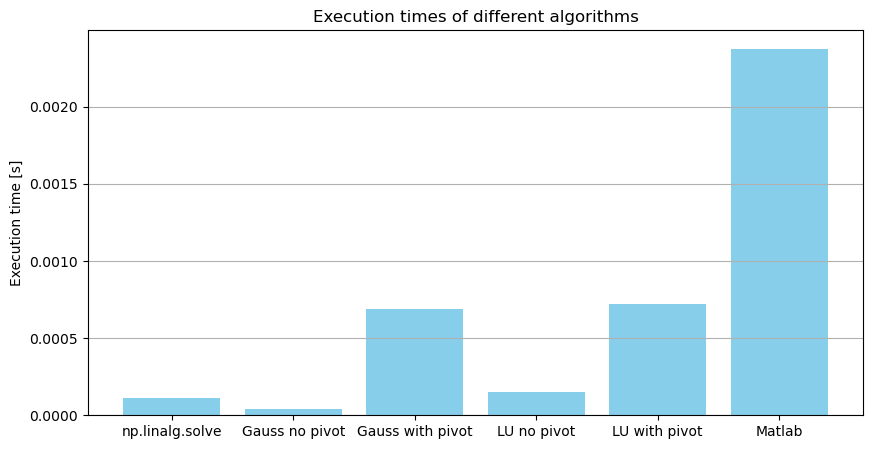

In [16]:
plot_function_time_comparsions(time_comparisons)

## Test dla macierzy gęstej 1000 x 1000

% Kod Matlab


rng(101, 'twister')

matrix_size = 1000;

A = randi([0 100], matrix_size, matrix_size);

A = double(A); 

B = randi([0 100], matrix_size, 1);

B = double(B);

% Gram-Schmidt process to make the columns of A linearly independent

for i = 1:size(A, 2)
    for j = 1:(i-1)
        A(:, i) = A(:, i) - (A(:, i)' * A(:, j)) / (A(:, j)' * A(:, j)) * A(:, j);
    end
end

tic;

% Perform LU factorization

[L, U] = lu(A);

% Solve the system LUx = b for x

% First, solve Ly = b for y

y = L \ B;

% Then, solve Ux = y for x

x = U \ y;

elapsedTime = toc;
disp(['Elapsed time: ', num2str(elapsedTime), ' seconds']);

% Output: Elapsed time: 0.01312 seconds

Execution times:
Matlab: 0.0131200 s
LU no pivot: 0.9538701 s
LU with pivot: 0.7942034 s
Gauss no pivot: 60.3811545 s
Gauss with pivot: 1.2715926 s
np.linalg.solve: 0.0077380 s
The fastest algorithm is:  {'np.linalg.solve': 0.0077380420043482445}


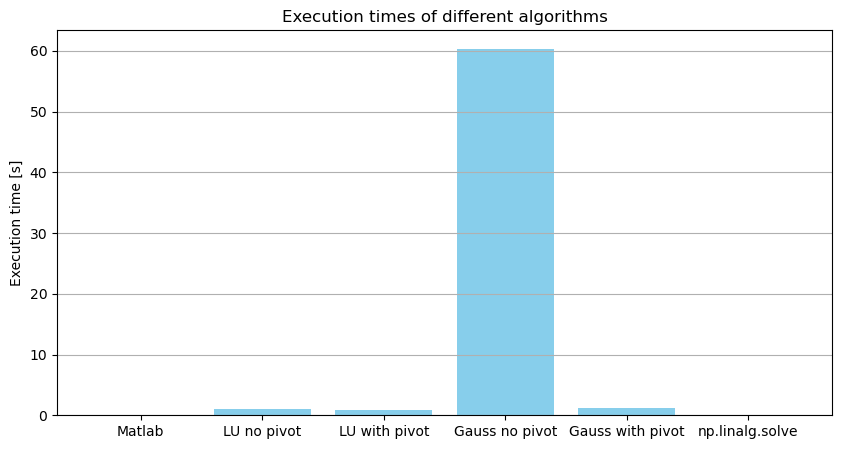

In [51]:
def linalg_solve(A: np.ndarray, B: np.ndarray) -> tuple[np.ndarray, float]:
    start = perf_counter()
    X_base = np.linalg.solve(A, B)
    stop = perf_counter()
    return X_base, stop - start

functions = [(lu_solve_no_pivot, 'LU no pivot'), (lu_solve_pivot,'LU with pivot'), (gaussian_elimination_no_pivot, 'Gauss no pivot'), (gaussian_elimination_with_pivot, 'Gauss with pivot'),(linalg_solve, 'np.linalg.solve')]
time_comparisons = []

matrix_size = 1000

A = np.random.randint(low=0, high=100, size=(matrix_size, matrix_size))
B = np.random.randint(low=0, high=100, size=(matrix_size, 1))

A = A.astype('float64')

# Gram-Schmidt process to make the columns of A linearly independent
for i in range(A.shape[1]):
    for j in range(i):
        A[:, i] -= np.dot(A[:, i], A[:, j]) / np.dot(A[:, j], A[:, j]) * A[:, j]

time_comparisons.append({"Matlab": 0.01312}) 
for function, function_name in functions:
    _, exec_time = function(A,B)
    time_comparisons.append({function_name: exec_time})
    
execution_times(time_comparisons)
plot_function_time_comparsions(time_comparisons)


Wnioski, Algorytmy nie są stabilne numerycznie. i czas obliczeń dla Gaussa bez pivotingu jest zdecydowanie dłuższy od pozostałych, Obliczenia przy użyciu np.linalg.solve i Matlaba, są stabilne numerycznie, i czasy obliczeń najkrótsze.